## Get gender

https://github.com/lead-ratings/gender-guesser

In [1]:
!pip install gender-guesser

    100% |████████████████████████████████| 389kB 10.5MB/s 


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import clear_output
import os
import re
plt.style.use('ggplot')

## Load data

In [10]:
# raw_data
file = '05_clean_data.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [11]:
df = pd.read_csv(data_directory)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
name                 217 non-null object
title                217 non-null object
summary              217 non-null object
year                 217 non-null int64
transcript           217 non-null object
link                 217 non-null object
len_transcript       217 non-null int64
dob                  217 non-null object
age_when_recorded    217 non-null int64
dtypes: int64(3), object(6)
memory usage: 15.3+ KB


In [62]:
def get_sex(data):
    fn = data['name'].split(' ')[0]
    d = gender.Detector()
    sex = d.get_gender(fn)
    print('name: {}\nsex: {}'.format(fn,sex))
    clear_output(wait = True)
    return sex

In [61]:
#test['name'].str.split(' ',expand=True)[0]
test.apply(get_sex,axis=1)

0        unknown
1           male
2    mostly_male
3           male
4           male
5           male
6           male
7           male
8         female
9           male
dtype: object

In [63]:
test = df.copy()[:10]
test.head()

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37
1,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,50
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62
3,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,43
4,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,46


In [64]:
test['sex'] = test.apply(get_sex,axis=1)

name: Pete
sex: male


In [65]:
test.head()

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37,unknown
1,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,50,male
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62,mostly_male
3,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,43,male
4,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,46,male


## Apply to dataframe

In [54]:
#df.name.str.split(' ',expand=True)[0]

In [66]:
%%time
df['sex'] = df.apply(get_sex,axis=1)

CPU times: user 48.4 s, sys: 6.83 s, total: 55.3 s
Wall time: 55.5 s


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
name                 217 non-null object
title                217 non-null object
summary              217 non-null object
year                 217 non-null int64
transcript           217 non-null object
link                 217 non-null object
len_transcript       217 non-null int64
dob                  217 non-null object
age_when_recorded    217 non-null int64
sex                  217 non-null object
dtypes: int64(3), object(7)
memory usage: 17.0+ KB


In [68]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37,unknown
1,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,50,male
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62,mostly_male
3,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,43,male
4,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,46,male


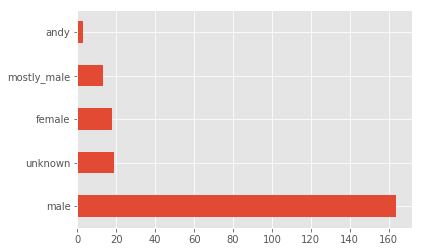

In [71]:
df.sex.value_counts().plot('barh')

## Fix sex values

In [76]:
andy_filter = df.sex =='andy'
unk_filter = df.sex =='unknown'
mm_filter = df.sex =='mostly_male'

In [73]:
df[andy_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
122,Frankie Boyle,Live 2 If I Could Reach Out Through Your Tv A...,Scotland's sharp-tongued comedian wears his po...,2010,"(Compere) Here we go, Apollo! (Cheering and wh...",https://scrapsfromtheloft.com/2017/10/18/frank...,53348,1972-08-16,38,andy
123,Frankie Boyle,Hurt Like You’Ve Never Been Loved,The notoriously controversial comedian Frankie...,2015,Funny that. I didn’t realise I was a moose fuc...,https://scrapsfromtheloft.com/2017/10/15/frank...,49031,1972-08-16,43,andy
124,Frankie Boyle,Live The Last Days Of Sodom,"Hilariously distasteful, highly offensive, bru...",2012,It’s just brilliant for somebody to speak the ...,https://scrapsfromtheloft.com/2017/10/15/frank...,63688,1972-08-16,40,andy


In [78]:
df.loc[122, 'sex'] = 'male'
df.loc[123, 'sex'] = 'male'
df.loc[124, 'sex'] = 'male'

In [80]:
df[mm_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62,mostly_male
16,Mo Amer,The Vagabond,Arab-American comedian Mo Amer recounts his li...,2018,A NETFLIX ORIGINAL COMEDY SPECIAL\n[audience c...,https://scrapsfromtheloft.com/2018/10/11/mo-am...,47565,1981-07-24,37,mostly_male
27,Rowan Atkinson,Live,"Filmed in Boston, Massachusetts, at the Huntin...",1992,"Filmed in Boston, Massachusetts, at the Huntin...",https://scrapsfromtheloft.com/2018/08/04/rowan...,29972,1955-01-01,37,mostly_male
57,Chris Rock,Bring The Pain,In his second HBO stand-up special Chris Rock ...,1996,Live from the Takoma Theatre in Washington D.C...,https://scrapsfromtheloft.com/2018/02/17/chris...,42273,1965-01-01,31,mostly_male
59,Chris Rock,Tamborine,For his first stand-up special in nearly a dec...,2018,[indistinct overlapping chatter] [woman] Ladie...,https://scrapsfromtheloft.com/2018/02/15/chris...,38904,1965-01-01,53,mostly_male
72,Chris Rock,Never Scared,"The number one reason people hate America, the...",2004,Chris Rock pulls out all the stops in his no-h...,https://scrapsfromtheloft.com/2018/01/19/chris...,62645,1965-01-01,39,mostly_male
76,Chris Tucker,Live,"In this Netflix special, Chris Tucker returns ...",2015,[upbeat music playing] [exhaling] [indistinct ...,https://scrapsfromtheloft.com/2018/01/14/chris...,67229,1971-08-31,44,mostly_male
89,Dylan Moran,"Like, Totally…","Acerbic, eternally world-weary comic in stand ...",2006,"Ladies and gentlemen, please welcome to the st...",https://scrapsfromtheloft.com/2018/01/05/dylan...,57686,1971-01-01,35,mostly_male
96,Whitney Cummings,I Love You,"In her second Comedy Central special, taped at...",2014,"Ladies and gentlemen, from the Barclay Theatre...",https://scrapsfromtheloft.com/2017/12/25/whitn...,40476,1982-01-01,32,mostly_male
97,Whitney Cummings,I’M Your Girlfriend,Whitney Cummings becomes every guy's girlfrien...,2016,"(techno music playing) ♪ ♪ ♪ Play it, say it, ...",https://scrapsfromtheloft.com/2017/12/25/whitn...,46713,1982-01-01,34,mostly_male


In [81]:
df.loc[2, 'sex'] = 'male'
df.loc[16, 'sex'] = 'male'
df.loc[27, 'sex'] = 'male'
df.loc[57, 'sex'] = 'male'
df.loc[59, 'sex'] = 'male'
df.loc[72, 'sex'] = 'male'
df.loc[76, 'sex'] = 'male'
df.loc[89, 'sex'] = 'male'
df.loc[96, 'sex'] = 'female'
df.loc[97, 'sex'] = 'female'
df.loc[110, 'sex'] = 'male'
df.loc[117, 'sex'] = 'male'
df.loc[138, 'sex'] = 'male'

In [82]:
df[unk_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37,unknown
10,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,1979-05-31,39,unknown
20,D.L. Hughley,Contrarian,D.L. Hughley riffs on hot-button political iss...,2018,THE UNIVERSITY OF THE ARTS MERRIAM THEATER\n♪A...,https://scrapsfromtheloft.com/2018/09/22/d-l-h...,40511,1963-01-01,55,unknown
21,Iliza Shlesinger,Freezing Hot,Comedian Iliza Shlesinger battles her inner vo...,2015,We’re in Denver. I have what I’m hoping is alt...,https://scrapsfromtheloft.com/2018/09/13/iliza...,59372,1983-02-22,32,unknown
22,Iliza Shlesinger,War Paint,Last Comic Standing season 6 winner Iliza Shle...,2013,“Last Comic Standing” winner Iliza Shlesinger ...,https://scrapsfromtheloft.com/2018/09/13/iliza...,64552,1983-02-22,30,unknown
25,Demetri Martin,The Overthinker,"With his signature one-liners and drawings, De...",2018,"[cheering, applause] [Demetri] Man, that was a...",https://scrapsfromtheloft.com/2018/08/11/demet...,45691,1973-05-25,45,unknown
28,Iliza Shlesinger,Confirmed Kills,Iliza Shlesinger performs in this standup talk...,2016,"Chicago, are you ready? Party goblins, are you...",https://scrapsfromtheloft.com/2018/07/31/iliza...,59933,1983-02-22,33,unknown
29,Iliza Shlesinger,Elder Millennial,Newly engaged comic Iliza Shlesinger dives int...,2018,"Guys, I’m about to take a giant ship. Thank yo...",https://scrapsfromtheloft.com/2018/07/30/iliza...,53174,1983-02-22,35,unknown
34,Deray Davis,How To Act Black,Dynamic comic DeRay Davis hits the stage like ...,2017,"[male announcer] ATL, get ready for the man of...",https://scrapsfromtheloft.com/2018/07/18/deray...,52546,1968-02-26,49,unknown
46,Kavin Jay,Everybody Calm Down!,"On a mission to defy stereotypes, Malaysian st...",2018,"Ladies and gentlemen, welcome to Kavin Jay: Ev...",https://scrapsfromtheloft.com/2018/05/06/kavin...,37454,1980-02-25,38,unknown


In [83]:
df.loc[0, 'sex'] = 'female'
df.loc[10, 'sex'] = 'male'
df.loc[20, 'sex'] = 'male'
df.loc[21, 'sex'] = 'female'
df.loc[22, 'sex'] = 'female'
df.loc[25, 'sex'] = 'male'
df.loc[28, 'sex'] = 'female'
df.loc[29, 'sex'] = 'female'
df.loc[34, 'sex'] = 'male'
df.loc[46, 'sex'] = 'male'
df.loc[66, 'sex'] = 'male'
df.loc[70, 'sex'] = 'male'
df.loc[84, 'sex'] = 'male'

df.loc[99, 'sex'] = 'female'
df.loc[104, 'sex'] = 'female'
df.loc[109, 'sex'] = 'male'
df.loc[135, 'sex'] = 'male'
df.loc[150, 'sex'] = 'male'
df.loc[196, 'sex'] = 'male'

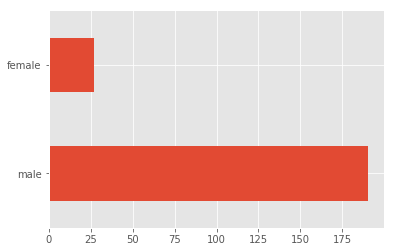

In [84]:
df.sex.value_counts().plot('barh')

In [85]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded,sex
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37,female
1,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,50,male
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62,male
3,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,43,male
4,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,46,male


## Save

In [86]:
# raw_data
file = '06_clean_data.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [87]:
df.to_csv(data_directory)